In [1]:
import time
import copy as cp

import numpy as np
from numba import jit, njit
PI = np.pi

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
plt.rcParams['image.cmap']='cool'  ## set a global cmap: 'cool' ,   'twilight_shifted', 'hsv', 'jet'
cmap = 'cool'
alpha = 0.9


$$ i \frac{\partial}{\partial \tau} \psi(\tau, \xi) + \frac{\partial^2}{\partial \xi^2} \psi(\tau, \xi)+ | \psi(\tau, \xi)|^2\cdot  \psi(\tau, \xi) =0$$

Solution:

$$ \psi(\tau, \xi) = \left[1 - \frac{4(1+2i\tau)}{1+4 \xi^2 + 4 \tau ^2} \right] e^{i\tau}$$

In [2]:
def plot_2D(f,  x_label = u'\u03BE', y_label =  u'\u03C4', title='$\psi(\zeta, \tau)$'):
    
    fig, ax = plt.subplots(figsize = (6, 10))
    ax.imshow(f, cmap='cool', origin='lower')
    ax.set_xlabel(x_label, fontsize=15);
    ax.set_ylabel(y_label, fontsize=15);
    ax.set_title(title, fontsize = 20) ;
    plt.show()


def plot_3D(x,y,z, x_label = u'\u03BE', y_label =  u'\u03C4', z_label=u'\u03C8(\u03C4, \u03BE)',
            title=u'\u03C8(\u03C4, \u03BE)', elev=15., azim=0):  
    
    fig = plt.figure( figsize = (10, 12))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, cmap = cmap, alpha = alpha)
    ax.set_xlabel(x_label, fontsize=15);
    ax.set_ylabel(y_label, fontsize=15);
    ax.set_zlabel(z_label, fontsize=15);
    ax.set_title(title, fontsize = 20);
    ax.view_init(elev=elev, azim=azim)
    plt.show()
    
    
def plot_3D_animation(x,y,z, x_label = u'\u03BE', y_label =  u'\u03C4', z_label=u'\u03C8(\u03C4, \u03BE)',
            title=u'\u03C8(\u03C4, \u03BE)'):  
       
    fig = plt.figure( figsize = (10, 12))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, cmap = cmap, alpha = alpha)
    ax.set_xlabel(x_label, fontsize=15);
    ax.set_ylabel(y_label, fontsize=15);
    ax.set_zlabel(z_label, fontsize=15);
    ax.set_title(title, fontsize = 20);
    ax.axis('off')
   
    ## For animation: rotation 
    for ii in range(0, 360, 5):
        ax.view_init(elev=15., azim=ii)
        fig.savefig("test_%d.png" % ii)

In [3]:
def f(x, t):
    x.astype(complex)
    t.astype(complex)

    return (1 - 4*(1+2*1j*t)/(1+ 4*x*x+4*t*t) )* np.exp(1j*t)

In [4]:
n = 1000

xx = np.linspace(-5, 5, n)
tt = np.linspace(-5, 5, n)

x,t = np.meshgrid(xx,tt)

ψ_analitical = f(x,t) 
ψ_analitical

ψ_analitical_real = ψ_analitical.real
ψ_analitical_imag = ψ_analitical.imag
ψ_analitical_module = np.absolute(ψ_analitical)


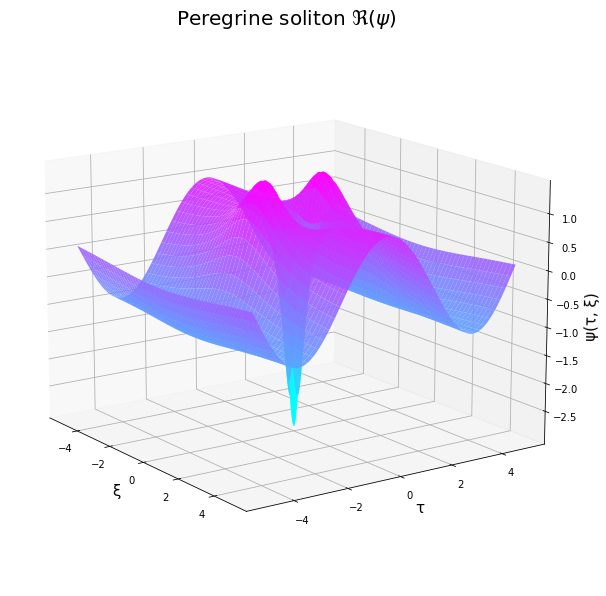

In [5]:
plot_3D(x, t, ψ_analitical_real, title = 'Peregrine soliton $\Re(\psi)$', elev=15., azim=-35)

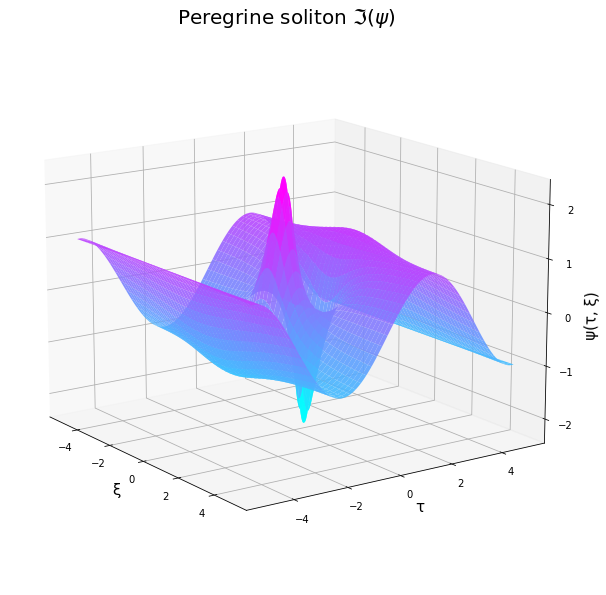

In [6]:
plot_3D(x, t, ψ_analitical_imag, title = 'Peregrine soliton $\Im(\psi)$', elev=15., azim=-35)

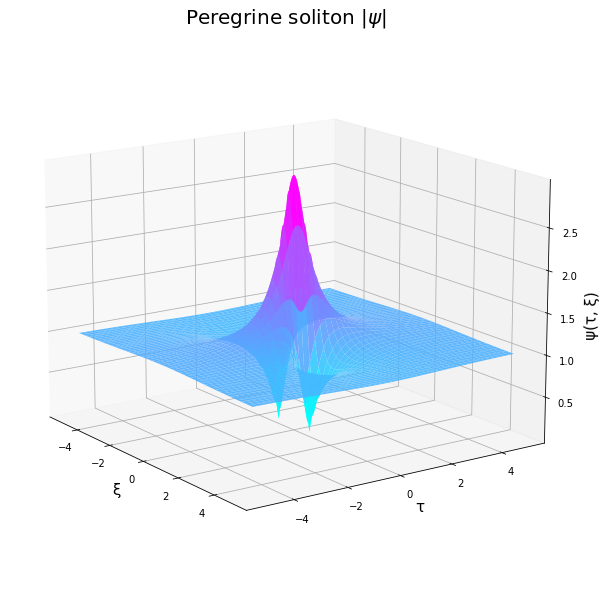

In [7]:
plot_3D(x, t, ψ_analitical_module, title = 'Peregrine soliton $|\psi|$', elev=15., azim=-35)

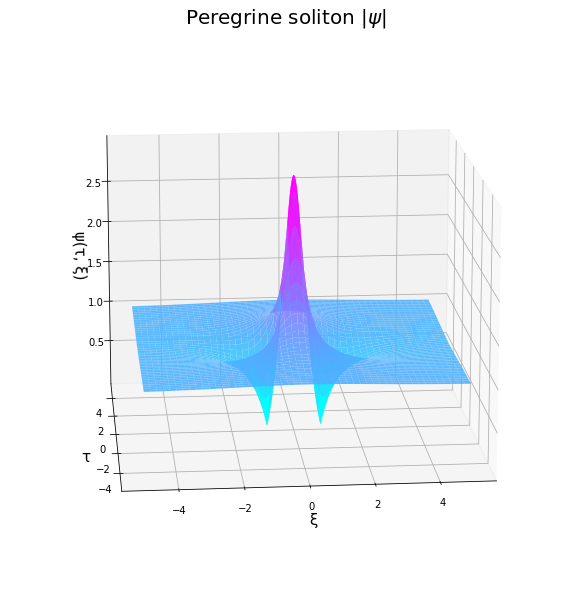

In [8]:
plot_3D(x, t, ψ_analitical_module, title = 'Peregrine soliton $|\psi|$', elev=15., azim=-95)

# Numerical solution:

$$ i \frac{\partial}{\partial \tau} \psi(\tau, \xi) + \frac{\partial^2}{\partial \xi^2} \psi(\tau, \xi)+ | \psi(\tau, \xi)|^2\cdot  \psi(\tau, \xi) =0$$

We may impose the following initial conditions (?):

$$ \psi(0, \xi) = \left[1 - \frac{4}{1+4 \xi^2 } \right]$$

1. Discretization:
$$ \xi_n = n\cdot d\xi, \qquad n=0,1,2,...,N-1$$
$$ \tau_m = m\cdot d\tau, \qquad m=0,1,2,...,M-1$$

$$ \psi_{m,n} = \psi(\tau_m, \xi_n)$$

2. initial conditions:
$$ \psi_{0,n} = \left[1 - \frac{4}{1+4 \xi^2_n } \right]$$




3.
The centered difference formulas for five-point stencils approximating second derivative:

$$ f''(x)\approx \frac {-f(x+2h)+16f(x+h)-30f(x)+16f(x-h)-f(x-2h)}{12h^{2}} $$
 
4. 
$$\frac{\partial \psi(x,t)}{\partial t}= \frac{i}{2}\frac{\partial^2 \psi}{\partial x^2}  - |\psi|^2\psi$$


 

4. $$ =  = \frac {-f(x+2h)+16f(x+h)-30f(x)+16f(x-h)-f(x-2h)}{12h^{2}}-|\psi|^2\psi$$

5.
$$ \frac{u^{n+1}_i - u^n_i}{t^{n+1}-t^n} = \frac {-u^n_{i+2} + 16\cdot u^n_{i+1} -30\cdot u^n_i +16\cdot u^n_{i-1} -u_{n-2}}{12 (x_{i+1}-x_i) ^{2}} - |\psi|^2\psi$$
